# `pandas dtypes` 

In [Section 1.1](./1_1_introduction_to_pandas.ipynb), we took our first look at the `pandas.DataFrame`.  In this section, we will take a closer look at `pandas` column types.

In [1]:
import pandas as pd
from dfply import *

## Hiding stack traceback

We hide the exception traceback for didactic reasons (code source: [see this post](https://stackoverflow.com/questions/46222753/how-do-i-suppress-tracebacks-in-jupyter)).  Don't run this cell if you want to see a full traceback.

In [2]:
import sys
ipython = get_ipython()

def hide_traceback(exc_tuple=None, filename=None, tb_offset=None,
                   exception_only=False, running_compiled_code=False):
    etype, value, tb = sys.exc_info()
    return ipython._showtraceback(etype, value, ipython.InteractiveTB.get_exception_only(etype, value))

ipython.showtraceback = hide_traceback

## Outline

* Three more `dtypes`
    * `datetime`
    * `Int64`
    * `category`
* Setting the `dtypes` at read time.

## Integers with missing values

* Older `pandas` $\rightarrow$ no missing `int`
    * Use `float` instead
* Latest version $\rightarrow$ `Int` classes
    * Notice the capital `I`

## Example - Artist `BeginDate` and `EndDate`

In [3]:
artist = pd.read_csv('./data/Artists.csv')
artist.head()

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,NaN,NaN


## There are lots of `0`s in the `BeginDate` 

Do we really think the Museam of **Modern** Art has artists from 0AD?

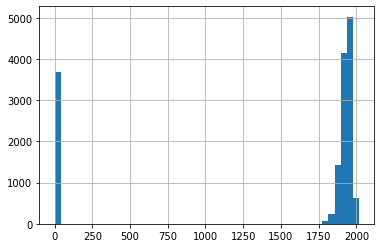

In [4]:
import matplotlib.pylab as plt
%matplotlib inline
artist.BeginDate.hist(bins=50)

## Same problem with `EndDate`, but even more so

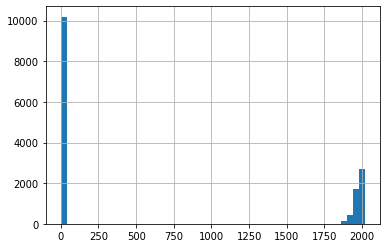

In [5]:
artist.EndDate.hist(bins=50)

## Using `apply` to remove the `0`s

In [6]:
transformed_BD = artist.BeginDate.apply(lambda val: np.nan if val == 0 else val)
transformed_BD.head()

0    1930.0
1    1936.0
2    1941.0
3    1946.0
4    1941.0
Name: BeginDate, dtype: float64

## What's up with the `float dtype`?

Good question, let's find out.

## Converting transformed `BeginDate` - attempt 1

Let's try to convert the `BeginDate` to `int`

In [7]:
transformed_BD.astype('int')

ValueError: Cannot convert non-finite values (NA or inf) to integer

## `pandas`, `int` and `np.nan` don't mix

* `pandas` `int` columns **cannot** have missing
* `pd.__version__ == 0.24.1` fixes this
    * Use `Int64` for integers with missing values
    * Note the capital `I`
* Update with `!pip install --upgrade pandas`

In [8]:
assert pd.__version__.startswith('1') or pd.__version__.startswith('0.24'), "Please upgrade your pandas and restart jupyter"
#!pip install --upgrade pandas

## Converting `BeginDate` to `Int64`

Hmm, that returned a `float` column.  Let's try to force `Int64`

In [9]:
transformed_BD.astype('Int64').head(15) # There we go!

0     1930
1     1936
2     1941
3     1946
4     1941
5     1925
6     1941
7     1923
8     1918
9     1886
10    1936
11    1911
12    1907
13    1900
14    <NA>
Name: BeginDate, dtype: Int64

## Downloading the 538 Uber FOIA data

The [Uber dataset from 538](https://github.com/fivethirtyeight/uber-tlc-foil-response) is too large to include in this module's repository.  If you haven't already downloaded the Uber data, execute the following.

In [11]:
!git clone https://github.com/fivethirtyeight/uber-tlc-foil-response ./data/uber

Cloning into './data/uber'...
remote: Enumerating objects: 58, done.
remote: Total 58 (delta 0), reused 0 (delta 0), pack-reused 58
Unpacking objects: 100% (58/58), done.
Checking out files: 100% (26/26), done.


## Example 2 - Uber rides

**Source:** [FiveThirtyEight Uber data](https://github.com/fivethirtyeight/uber-tlc-foil-response)

**Note:** The actual data is pretty large, which we will deal with in the next section.  For now, we will load a subset (first 1000 rows).

In [12]:
uber_april_raw = pd.read_csv("./data/uber/uber-trip-data/uber-raw-data-apr14.csv")
uber_april_raw.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


## <font color="red"> Exercise 1</font>

Fix the names.  Be sure to rename the `"Date/Time"` `'date'` and name the resulting data frame `uber_april_renamed`.

In [17]:
# Your code here
uber_april_renamed = uber_april_raw.rename(columns= {'Date/Time':'date'})


In [18]:
uber_april_renamed

,date,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764


## <font color="red"> Exercise 2</font>

**Tasks:**

1. Inspect the `dtypes`
2. Suggest a good type for the `date` column

In [19]:
# Your code here
uber_april_renamed.dtypes

date     object
Lat     float64
Lon     float64
Base     object
dtype: object

> *Your answer here*
I think that datetime would be a good type for the date column

## Changing to date type with  `pd.to_datetime`

In [21]:
pd.to_datetime(uber_april_renamed.date.head())

0   2014-04-01 00:11:00
1   2014-04-01 00:17:00
2   2014-04-01 00:21:00
3   2014-04-01 00:28:00
4   2014-04-01 00:33:00
Name: date, dtype: datetime64[ns]

## Making a `dfply` compatible column function.

Suppose you have a function you want to use inside `mutate` (i.e. a **column function**).  To make this function compatable with `dfply.Intention`s, you should 

1. Wrap the `pandas` call inside a function.
2. Decorate with `@make_symbolic`

In [22]:
@make_symbolic
def to_datetime(series, infer_datetime_format=True):
    return pd.to_datetime(series, infer_datetime_format=infer_datetime_format)

## Converting to dates with `dfply`

Note that above function is available in `more_dfply.to_datetime` is a `dfply` compatible version of `pd.to_datetime`.

In [23]:
!pip install more_dfply

     |████████████████████████████████| 55 kB 1.5 MB/s eta 0:00:01
  Attempting uninstall: toolz
    Found existing installation: toolz 0.10.0
    Uninstalling toolz-0.10.0:
      Successfully uninstalled toolz-0.10.0


In [25]:
from more_dfply import to_datetime
uber_april = (uber_april_renamed >>
                mutate(date = to_datetime(X.date)))
uber_april.dtypes

date    datetime64[ns]
Lat            float64
Lon            float64
Base            object
dtype: object

## Why convert to `datetime`?

This series type provides many useful date methods and attributes.  For example, we get many **dateparts methods** in the `dt` attribute.

In [26]:
uber_april_weekday = (uber_april  >>
                        mutate(weekday = X.date.dt.day_name()))
uber_april_weekday.head()

,date,Lat,Lon,Base,weekday
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday


## <font color="red"> Exercise 3</font>

**Tasks:**

1. Use `dir` to inspect the dateparts found in `dt`
2. Add a few more datepart columns.
3. Name the resulting dataframe `uber_april_datepart`

In [33]:
# Your code here
dir

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

> *Your answer here*

## Specifying date columns while reading

Pass a list of date columns to `parse_dates`

In [35]:
from toolz import first
uber_april_with_datetime = pd.read_csv("./data/uber/uber-trip-data/uber-raw-data-apr14.csv", 
                                       parse_dates=['Date/Time'])

uber_april_with_datetime.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

## Explicit date parsing

* Create a parser function
* Pass to `date_parser`
* Use if `pandas` fails to parse
* More information about format codes [here](https://docs.python.org/2/library/datetime.html#strftime-strptime-behavior)

In [ ]:
dateparse = lambda x: pd.to_datetime(x, format = "%Y-%m-%d %H:%M:%S")
uber_april_parsered = pd.read_csv('./data/uber/uber-trip-data/uber-raw-data-apr14.csv', 
                              parse_dates=['Date/Time'],
                              date_parser=dateparse)
uber_april_parsered.head()

/var/folders/hv/g54zcwg95p37wt896_4s3n_00000gn/T/ipykernel_34785/3429834196.py:2: FutureWarning: 
        Use pd.to_datetime instead.

  uber_april_parsered = pd.read_csv('./data/uber/uber-trip-data/uber-raw-data-apr14.csv',


## Categorical dtype

* Similar to `R`s factor
* Allows for nominal or ordinal categories

In [36]:
uber_april_weekday_cat = (uber_april_weekday >>
                            mutate(weekday = X.weekday.astype('category')))
uber_april_weekday_cat.dtypes

ERROR! Session/line number was not unique in database. History logging moved to new session 19


date       datetime64[ns]
lat               float64
lon               float64
base               object
weekday          category
dtype: object

## Let's plot the weekdays with `seaborn.catplot`

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

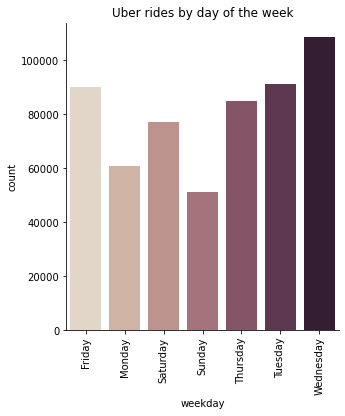

In [68]:
weekday_plot = sns.catplot( x="weekday", 
                            kind="count", 
                            palette="ch:.25", 
                            data=uber_april_weekday_cat)
# set title and rotate the long x labels
_ = weekday_plot.ax.set_title("Uber rides by day of the week")
_ = weekday_plot.ax.set_xticklabels(weekday_plot.ax.get_xticklabels(),rotation=90)

## Nominal by default

* Setting `'category'` makes this nominal
* Weekdays are actually ordinal
* Notice the alphabetical order in the plot.

## Making the data ordinal

1. Make a new category class with `CategoricalDtype`
2. Use `astype` with your new dtype class

#### Making an order weekday category

In [62]:
from calendar import day_name
list(day_name)

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [63]:
weekday_categories = pd.CategoricalDtype(categories=list(day_name),
                                     ordered=True)
weekday_categories

CategoricalDtype(categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                  'Saturday', 'Sunday'],
, ordered=True)

#### Changing to our custom type

In [64]:
uber_april_weekday_ord = (uber_april_weekday >>
                            mutate(weekday = X.weekday.astype(weekday_categories)))
uber_april_weekday_ord.dtypes

date       datetime64[ns]
lat               float64
lon               float64
base               object
weekday          category
dtype: object

## Plot the ordinal weekdays with `seaborn.catplot`

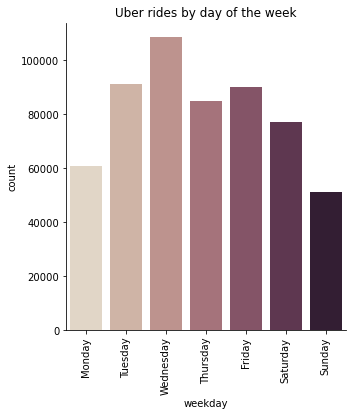

In [69]:
import seaborn as sns
ordered_plot = sns.catplot( x="weekday", 
                            kind="count", 
                            palette="ch:.25", 
                            data=uber_april_weekday_ord)
# rotate the long x labels
_ = ordered_plot.ax.set_title("Uber rides by day of the week")
_ = ordered_plot.ax.set_xticklabels(ordered_plot.ax.get_xticklabels(),rotation=90)

## <font color="red"> Exercise 4</font>

Sometimes there is an advantage to treating calendar years as ordinal data.  Perform the following steps on the `Artist` data loaded above.

**Tasks:**

1. Remove the `0` from `BeginDate` and switch the type to `Int64`.
2. Filter out the rows that are missing `BeginDate`
3. Determine the minimum and maximum values of the filtered `BeginDate`s
4. Create a new ordinal category class for this date range.
5. Use `sns.catplot` to plot the distribution of the dates.

In [36]:
# Your code here

> *Your answer here*